In [1]:
import math
import numpy as np
from scipy.stats import linregress
import pandas as pd
from scipy.stats import wilcoxon
import cbmpy
from src.nn_model.amn_qp_old_code import *
from src.utils.import_GEM import *

pyparsing import
CBGLPK based on swiglpk: not all methods implimented yet! 5.0



No module named 'cplex'



CPLEX not available

*****
Using GLPK
*****

doFBAMinSum not available with GLPK


***********************************************************************
* Welcome to CBMPy (0.8.8) - PySCeS Constraint Based Modelling        *
*       https://systemsbioinformatics.github.io/cbmpy/                *
* Copyright (C) Brett G. Olivier, 2014 - 2024                         *
* Systems Biology Lab, A-LIFE, AIMMS, Faculty of Science              *
* Vrije Universiteit Amsterdam, Amsterdam, The Netherlands            *
* This version of CBMPy distributed under the GNU GPL v 3.0 licence   *
***********************************************************************

Namespace(L1='MSE', Qp_iteration=8, device='cuda:0', exp_name='test', model='AMN', prior_knowledge=False)


In [2]:
model_GEM = import_GEM(filename='GEMs/iNF517_reducedFVA_splitted.xml', split=True)

Attempting to load SBML file: GEMs/iNF517_reducedFVA_splitted.xml
SBML Level 3 FBC version 2 model detected, loading with cbmpy.readSBML3FBC()
FBC version: 2
M.getNumReactions: 704
M.getNumSpecies: 650
FBC.getNumObjectives: 1
FBC.getNumParameters: 14
FBC.getNumGeneProducts: 361
FluxBounds process1: 0.017
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.018
Gene G_LLMG_RS03320 is not part of a GPR association. Will create anyway!
Gene G_LLMG_RS11480 is not part of a GPR association. Will create anyway!
Gene G_LLMG_RS11485 is not part of a GPR association. Will create anyway!
Gene G_LLMG_RS09975 is not part of a GPR association. Will create anyway!
Gene G_LLMG_RS08825 is not part of a GPR association. Will create anyway!
Gene G_LLMG_RS08260 is not part of a GPR association. Will create anyway!
Gene G_LLMG_RS04745 is not part of a GPR association. Will create anyway!
Gene G_LLMG_RS11835 is not part of a GPR association. Will create anyway!
Gene G_LLMG_RS00755 is no

In [3]:
for i in model_GEM.getReactionIds():
    if 'R_TKT1_fwd' in i:
        print(i)

In [ ]:
reference= ['R_GLCptspp', 'R_PGI_fwd', 'R_PFK', 'R_FBA_fwd', 'R_TPI_fwd',
       'R_PGK_rev', 'R_GAPD_fwd', 'R_ENO_fwd', 'R_PGM_rev', 'R_PYK', 'R_PDH',
       'R_G6PDH2r_fwd', 'R_PGL', 'R_GND', 'R_RPE_fwd', 'R_RPI_rev',
       'R_TKT1_fwd', 'R_TALA_fwd', 'R_TKT2_fwd', 'R_CS', 'R_ACONTb_fwd',
       'R_ACONTa_fwd', 'R_ICDHyr_fwd', 'R_SUCOAS_rev', 'R_AKGDH', 'R_SUCDi',
       'R_FUM_fwd', 'R_MDH_fwd', 'R_PPC', 'R_ME2', 'R_ICL', 'R_MALS',
       'R_ACKr_rev', 'R_PTAr_fwd', 'R_LDH_D_rev', 'R_ACALD_rev',
       'R_ALCD2x_rev',  'R_EX_co2_e_fwd', 'R_EX_etoh_e','R_EX_ac_e', 'R_EX_lac__D_e',
       'R_EX_succ_e', 'R_EX_pyr_e', 'R_EX_for_e','R_BIOMASS_Ec_iAF1260_core_59p81M']

input_ub = ['R_GLCptspp', 'R_PGI_fwd']

# Initialize your GEM and AMN_QP model architecture
model_GEM = import_GEM(filename='GEMs/iAF1260_split_FBA_reduction.xml', split=True)
model_GEM = GEM(model=model_GEM)
S, Pin, Pref = model_GEM.build_GEM_matrices(input_ub, reference)

Attempting to load SBML file: GEMs/iAF1260_split_FBA_reduction.xml
SBML Level 3 FBC version 2 model detected, loading with cbmpy.readSBML3FBC()
FBC version: 2
M.getNumReactions: 587
M.getNumSpecies: 493
FBC.getNumObjectives: 1
FBC.getNumParameters: 4
FBC.getNumGeneProducts: 1261
FluxBounds process1: 0.014
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.018
Gene G_b2835 is not part of a GPR association. Will create anyway!
Gene G_b1245 is not part of a GPR association. Will create anyway!
Gene G_b1329 is not part of a GPR association. Will create anyway!
Gene G_b1246 is not part of a GPR association. Will create anyway!
Gene G_b1247 is not part of a GPR association. Will create anyway!
Gene G_b1244 is not part of a GPR association. Will create anyway!
Gene G_b0929 is not part of a GPR association. Will create anyway!
Gene G_b1377 is not part of a GPR association. Will create anyway!
Gene G_b2215 is not part of a GPR association. Will create anyway!
Gene G_b0241 

In [3]:
import torch 
state_dict = torch.load("pretrained_block_reservoir_state_dict.pth")
load_result = model.load_state_dict(state_dict, strict=False)
print("Missing keys:", load_result.missing_keys)
print("Unexpected keys:", load_result.unexpected_keys)

Missing keys: []
Unexpected keys: []


In [2]:
import torch 

from src.nn_model.amn_qp_old_code import *
from src.utils.import_GEM import *
# Load the full model
# step 1: build/load and split model
model_GEM = import_GEM(filename='GEMs/iAF1260_split_FBA_reduction.xml', split=True)

# step 2: initialize object GEM which will have all the matrices as attributes
model_GEM = GEM(model=model_GEM)
model = AMN_QP(input_size=5, hidden_size=500, output_size=587, drop_rate=0.25, model=model_GEM)  # Initialize with the correct architecture
model.load_state_dict(torch.load("pretrained_block_reservoir_state_dict.pth"))


Attempting to load SBML file: GEMs/iAF1260_split_FBA_reduction.xml
SBML Level 3 FBC version 2 model detected, loading with cbmpy.readSBML3FBC()
FBC version: 2
M.getNumReactions: 587
M.getNumSpecies: 493
FBC.getNumObjectives: 1
FBC.getNumParameters: 4
FBC.getNumGeneProducts: 1261
FluxBounds process1: 0.015
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.018
Gene G_b2835 is not part of a GPR association. Will create anyway!
Gene G_b1245 is not part of a GPR association. Will create anyway!
Gene G_b1329 is not part of a GPR association. Will create anyway!
Gene G_b1246 is not part of a GPR association. Will create anyway!
Gene G_b1247 is not part of a GPR association. Will create anyway!
Gene G_b1244 is not part of a GPR association. Will create anyway!
Gene G_b0929 is not part of a GPR association. Will create anyway!
Gene G_b1377 is not part of a GPR association. Will create anyway!
Gene G_b2215 is not part of a GPR association. Will create anyway!
Gene G_b0241 

<All keys matched successfully>

In [8]:
ex_fluxes = ['R_EX_glc__D_e_rev', 'R_EX_o2_e_rev', 'R_EX_co2_e_fwd', 'R_EX_etoh_e', 'R_EX_ac_e']


In [2]:
import pandas as pd

df = pd.read_csv('FBA_simulated_data_reservoir_EX_fluxes_noKO.csv')
column_name = "R_BIOMASS_Ec_iAF1260_core_59p81M"
threshold = 5e-3
filtered_df = df[df[column_name] >= threshold]
print(len(filtered_df))

16876


In [3]:
import pandas as pd

df = pd.read_csv('FBA_simulated_data_reservoir_EX_fluxes_noKO.csv')
column_name = "R_BIOMASS_Ec_iAF1260_core_59p81M"
threshold = 5e-3
filtered_df = df[df[column_name] >= threshold]
print(len(filtered_df))


filtered_df.reset_index(drop=True, inplace=True)

output_file= 'FBA_simulated_data_reservoir_EX_fluxes_noKO_filtered.csv'
filtered_df.to_csv(output_file, index=False)



16876


In [4]:
df = pd.read_csv('FBA_simulated_data_reservoir_47_fluxes_noKO_filtered.csv')
len(df)

3222

In [4]:
df = pd.read_csv('FBA_simulated_data_reservoir_47_fluxes_filtered.csv')
df.head()

,R_GLCptspp_ub,R_PGI_fwd_ub,R_PFK_ub,R_FBA_fwd_ub,R_TPI_fwd_ub,R_PGK_rev_ub,R_GAPD_fwd_ub,R_ENO_fwd_ub,R_PGM_rev_ub,R_PYK_ub,...,R_TALA_rev,R_TRPAS2_rev,R_URIDK2r_rev,R_TYRTA_rev,R_VALTA_rev,R_UAGAAT_fwd,R_XANtex_rev,R_XANtpp_rev,R_Zn2tex_fwd,R_UMPK_fwd
0,14.795677,0.725671,4.923022,12.109285,11.691764,4.072832,26.228374,20.04976,11.45072,6.75912,...,0.0,0.004286,0.001973,0.010415,0.031911,0.002933,0.67343,0.67343,0.000238,0.028504


In [ ]:
import pandas as pd

df = pd.read_csv('FBA_simulated_data_reservoir_47_fluxes_filtered.csv')
df["R_BIOMASS_Ec_iAF1260_core_59p81M"].

0.4120567103892021

In [ ]:
max_values = df.max()
print(max_values)

In [4]:
flux = pd.read_csv('data/ishii_data/fluxomics_iAF1260_reduced_split.csv', index_col='experiment')


In [14]:
list(flux.columns)

['R_GLCptspp',
 'R_PGI_fwd',
 'R_PFK',
 'R_FBA_fwd',
 'R_TPI_fwd',
 'R_PGK_rev',
 'R_GAPD_fwd',
 'R_ENO_fwd',
 'R_PGM_rev',
 'R_PYK',
 'R_PDH',
 'R_G6PDH2r_fwd',
 'R_PGL',
 'R_GND',
 'R_RPE_fwd',
 'R_RPI_rev',
 'R_TKT1_fwd',
 'R_TALA_fwd',
 'R_TKT2_fwd',
 'R_CS',
 'R_ACONTb_fwd',
 'R_ACONTa_fwd',
 'R_ICDHyr_fwd',
 'R_SUCOAS_rev',
 'R_AKGDH',
 'R_SUCDi',
 'R_FUM_fwd',
 'R_MDH_fwd',
 'R_PPC',
 'R_ME2',
 'R_ICL',
 'R_MALS',
 'R_ACKr_rev',
 'R_PTAr_fwd',
 'R_LDH_D_rev',
 'R_ACALD_rev',
 'R_ALCD2x_rev',
 'R_EX_glc__D_e_rev',
 'R_EX_o2_e_rev',
 'R_EX_co2_e_fwd',
 'R_EX_etoh_e',
 'R_EX_ac_e',
 'R_EX_lac__D_e',
 'R_EX_succ_e',
 'R_EX_pyr_e',
 'R_EX_for_e',
 'R_BIOMASS_Ec_iAF1260_core_59p81M']

In [13]:
list(flux.max() + flux.max()/5)

[16.008,
 8.96448,
 12.8064,
 12.8064,
 12.8064,
 27.2136,
 27.2136,
 25.93296,
 25.93296,
 6.88344,
 20.33016,
 6.7233600000000004,
 6.7233600000000004,
 6.7233600000000004,
 3.84192,
 2.8814399999999996,
 2.08104,
 2.08104,
 1.76088,
 14.24712,
 14.24712,
 14.24712,
 14.24712,
 13.28664,
 13.28664,
 13.28664,
 13.28664,
 13.28664,
 2.72136,
 0.3588,
 1.11228,
 1.11228,
 2.24112,
 2.24112,
 0.0,
 0.16008,
 0.16008,
 16.008,
 18.636,
 12.996,
 0.18,
 2.316,
 0.0,
 0.012,
 0.012,
 0.156,
 0.84]

In [2]:
ground_truth = pd.read_csv('/workspaces/amn_fba/data/ishii_data/fluxomics_iAF1260_reduced_split.csv').drop(columns=['experiment','R_EX_glc__D_e_rev', 'R_EX_o2_e_rev']).abs()

best_rf = pd.read_csv('/workspaces/amn_fba/data/ishii_data/best_rf_ishii.csv').T.abs()
best_rf.columns = ground_truth.columns
best_rf = best_rf.reset_index(drop=True)

best_NN = pd.read_csv('/workspaces/amn_fba/data/ishii_data/ishii_NN.csv').T.abs().reset_index(drop=True)
best_NN.columns = ground_truth.columns
best_NN = best_NN.reset_index(drop=True)

best_pfba = pd.read_csv('/workspaces/amn_fba/data/ishii_data/pFBA_ishii.csv').drop(columns=['Unnamed: 0']).abs().T.reset_index(drop=True)
best_pfba.columns = ground_truth.columns
best_pfba = best_pfba.reset_index(drop=True)


minn_balanced = pd.read_csv('/workspaces/amn_fba/data/ishii_data/minn_results/df_pred_minn_balanced.csv')

In [8]:
def metrics_table(df_true, df_pred):

    def r2_metric(true,pred):
        m, n = true.shape
        r_squared_scores = np.zeros((m,))
        for i in range(m):
            y_true = true[i, :]
            y_pred = pred[i, :]
            try:
                slope, intercept, r, p, se = linregress(y_true, y_pred)
            except:
                r_squared_scores[i] = 0
                continue
            r_squared_scores[i] = r**2

        return r_squared_scores

    mse_per_row = np.mean((np.abs(df_true - df_pred)), axis=1)
    # Calculate the average of MSEs across all rows
    average_mse = np.mean(mse_per_row)
    # Calculate the standard deviation of MSE values
    mse_std = np.std(mse_per_row)

    rmse_per_row = np.sqrt(np.mean(np.square(df_true-df_pred), axis=1))
    # Calculate the average of MSEs across all rows
    average_rmse = np.mean(rmse_per_row)
    # Calculate the standard deviation of MSE values
    rmse_std = np.std(rmse_per_row)

    NE_per_row = np.nan_to_num(np.linalg.norm((df_true - df_pred), axis=1) / np.linalg.norm(df_true, axis=1), posinf=0, neginf=0, nan=0)
    # Calculate the average of MSEs across all rows
    average_NE = np.mean(NE_per_row)
    # Calculate the standard deviation of MSE values
    NE_std = np.std(NE_per_row)

    q2_per_row = r2_metric(df_true.values, df_pred.values)
    # Calculate the average of MSEs across all rows
    average_q2 = np.mean(q2_per_row)
    # Calculate the standard deviation of MSE values
    q2_std = np.std(q2_per_row)

    diff_per_row = df_true - df_pred


    df_metrics= pd.DataFrame({'R2': q2_per_row, 
                              'MAE': mse_per_row,
                              'RMSE': rmse_per_row,
                              'NE': NE_per_row,})
    

    return df_metrics


def p_value_wilcoxon(df_metrics_rf, df_metrics_model):

    differences_R2 = list(df_metrics_rf['R2'] - df_metrics_model['R2'])
    differences_MAE = list(df_metrics_rf['MAE'] - df_metrics_model['MAE'])
    differences_RMSE = list(df_metrics_rf['RMSE'] - df_metrics_model['RMSE'])
    differences_NE = list(df_metrics_rf['NE'] - df_metrics_model['NE'])

    # Perform Wilcoxon signed-rank test
    _, p_value_R2 = wilcoxon(differences_R2)
    _, p_value_MAE = wilcoxon(differences_MAE)
    _, p_value_RMSE = wilcoxon(differences_RMSE)
    _, p_value_NE = wilcoxon(differences_NE)

    # Combine p-values using the median
    p_values = [p_value_R2, p_value_MAE, p_value_RMSE, p_value_NE]
    median_p_value = np.median(p_values)


    return median_p_value



In [9]:
metrics_pfba = metrics_table(ground_truth, best_pfba)
metrics_NN = metrics_table(ground_truth, best_NN)
metrics_rf = metrics_table(ground_truth, best_rf)
metrics_minn_balanced = metrics_table(ground_truth, minn_balanced)

In [10]:
p_value = p_value_wilcoxon(metrics_rf, metrics_minn_balanced)
print(p_value)

0.7539288303860654


# Wilcoxon on differences between fluxes

In [11]:
def diff_wilcoxon(df_true, df_pred):

    p_values = []
    
    for i in range(df_pred.shape[1]):

        true_values = df_true.iloc[:, i].values
        pred_values = df_pred.iloc[:, i].values
                    
        # Perform Wilcoxon signed-rank test
        _, p_value = wilcoxon((true_values - pred_values)+1e-9)
        p_values.append(p_value)


    return p_values



In [12]:
np.median(diff_wilcoxon(best_NN, minn_balanced))

0.06448905195968246

In [13]:
np.median(diff_wilcoxon(best_pfba, best_rf))

4.174619343439777e-05

In [14]:
diff_wilcoxon(best_pfba, best_rf)

[0.3811715864506616,
 0.23010529565988946,
 4.174619343439777e-05,
 4.174619343439777e-05,
 0.642003911924413,
 0.9053327102078165,
 0.9053327102078165,
 0.48220904503166206,
 0.48220904503166206,
 2.5630832507250074e-06,
 5.0273850202546946e-05,
 0.24733722014186277,
 0.12209034758061738,
 0.12209034758061738,
 0.028181182907209452,
 0.061427334379329415,
 0.1504502624314629,
 0.1504502624314629,
 0.0008354201527308503,
 2.848903312076321e-06,
 2.848903312076321e-06,
 2.848903312076321e-06,
 2.6026076788230615e-05,
 5.321826524614072e-06,
 1.9496331812351264e-05,
 2.5630832507250074e-06,
 4.800857940209393e-06,
 2.5630832507250074e-06,
 3.901655676493975e-06,
 2.5630832507250074e-06,
 2.5630832507250074e-06,
 2.5630832507250074e-06,
 1.0809064248240008e-05,
 1.0809064248240008e-05,
 1.1372725656979623e-07,
 2.5630832507250074e-06,
 2.5630832507250074e-06,
 0.0009028823434238286,
 2.5561870245802228e-06,
 0.0005126103293504418,
 7.237829871739995e-08,
 3.473682506124481e-06,
 0.3028168

In [13]:
fluxes_right_names = pd.read_csv("data/ishii_data/fluxomics_iAF1260_reduced_split.csv")
fluxes_right_names

,experiment,R_GLCptspp,R_PGI_fwd,R_PFK,R_FBA_fwd,R_TPI_fwd,R_PGK_rev,R_GAPD_fwd,R_ENO_fwd,R_PGM_rev,...,R_EX_glc__D_e_rev,R_EX_o2_e_rev,R_EX_co2_e_fwd,R_EX_etoh_e,R_EX_ac_e,R_EX_lac__D_e,R_EX_succ_e,R_EX_pyr_e,R_EX_for_e,R_BIOMASS_Ec_iAF1260_core_59p81M
0,REF,2.93,2.2854,2.49929,2.49929,2.49929,5.0396,5.0396,4.73781,4.73781,...,2.93,5.79,4.11,0.00,0.00,0.0,0.00,0.00,0.00,0.2
1,WT_0.1h-1,1.34,0.8308,1.07200,1.07200,1.07200,2.2378,2.2378,2.10380,2.10380,...,1.34,2.20,0.31,0.00,0.00,0.0,0.00,0.00,0.00,0.1
2,WT_0.4h-1,5.05,3.1815,3.98950,3.98950,3.98950,8.3325,8.3325,7.72650,7.72650,...,5.05,9.57,7.88,0.00,0.01,0.0,0.00,0.00,0.00,0.4
3,WT_0.5h-1,6.63,5.5029,5.76810,5.76810,5.76810,11.4699,11.4699,10.74060,10.74060,...,6.63,13.05,8.95,0.15,0.49,0.0,0.00,0.00,0.13,0.5
4,WT_0.7h-1,13.34,7.4704,10.67200,10.67200,10.67200,22.6780,22.6780,21.61080,21.61080,...,13.34,14.87,10.83,0.15,1.93,0.0,0.00,0.01,0.08,0.7
5,galM,3.04,1.9456,2.46240,2.46240,2.46240,5.1072,5.1072,4.83360,4.83360,...,3.04,15.53,5.76,0.00,0.00,0.0,0.00,0.00,0.00,0.2
6,glk,3.14,2.7318,2.79460,2.79460,2.79460,5.5578,5.5578,5.24380,5.24380,...,3.14,5.44,6.46,0.00,0.00,0.0,0.00,0.00,0.00,0.2
7,pgm,3.06,2.3868,2.63160,2.63160,2.63160,5.2938,5.2938,5.01840,5.01840,...,3.06,5.79,6.12,0.00,0.00,0.0,0.00,0.00,0.00,0.2
8,pgi,2.73,0.0000,0.92820,0.92820,0.92820,3.2760,3.2760,2.97570,2.97570,...,2.73,4.45,5.04,0.00,0.00,0.0,0.00,0.00,0.00,0.2
9,pfkA,2.72,2.2848,2.36640,2.36640,2.36640,4.7056,4.7056,4.40640,4.40640,...,2.72,9.56,2.94,0.00,0.00,0.0,0.00,0.00,0.00,0.2


# add KOs as Vin

In [ ]:
import pandas as pd
import cbmpy

fluxes_right_names = pd.read_csv("data/ishii_data/fluxomics_iAF1260_reduced_split.csv", index_col='experiment')

kos_dict = {
'REF': ['no'],
'WT_0.1h-1':['no'],
'WT_0.4h-1':['no'],
'WT_0.5h-1':['no'],
'WT_0.7h-1':['no'],
'galM': ['R_GALM2pp'],
'glk': ['R_GNK'],
'pgm': ['R_PGMT'],
'pgi': ['R_PGI'],
'pfkA': ['R_PFK', 'R_PFK_2'],
'pfkB': ['R_PFK'],
'fbp': ['R_FBP'],
'fbaB': ['R_FBA'],
'gapC': ['R_GAPD'],
'gpmA': ['R_PGM'],
'gpmB': ['R_PGM'],
'pykA': ['R_PYK'],
'pykF': ['R_PYK'],
'ppsA': ['R_PPS'],
'zwf': ['R_G6PDH2r'],
'pgl': ['R_PGL'],
'gnd': ['R_GND'],
'rpe': ['R_RPE'],
'rpiA': ['R_RPI'],
'rpiB': ['R_RPI'],
'tktA': ['R_TKT1', 'R_TKT2'],
'tktB': ['R_TKT1', 'R_TKT2'],
'talA': ['R_TALA'],
'talB': ['R_TALA']}



model = cbmpy.CBRead.loadModel('GEMs/iAF1260_reduced_split.xml')
model = cbmpy.CBTools.splitReversibleReactions(model)
reactions = model.getReactionIds()




In [7]:
for k,v in kos_dict.items():
    new_v = []
    for i in v:
        if i in reactions:
            new_v.append(i)
        elif i+'_rev' in reactions:
            new_v.append(i+'_rev')
        elif i+'_fwd' in reactions:
            new_v.append(i+'_fwd')
            
    kos_dict[k]= new_v

In [11]:
# Extract unique column names
columns = set()
for values in kos_dict.values():
    columns.update(values)
columns = sorted(columns)  # Sort columns for readability

# Create a DataFrame with 1s
df = pd.DataFrame(1, index=kos_dict.keys(), columns=columns)

# Set specific cells to 0 based on the dictionary values
for key, values in kos_dict.items():
    for value in values:
        df.at[key, value] = 0

df.to_csv('data/ishii_data/KOs_Vin.csv')

# synthetic dataset

In [3]:
# Libraries for data handling
import numpy as np
import pandas as pd
import cbmpy
import time
import random

pyparsing import
CBGLPK based on swiglpk: not all methods implimented yet! 5.0



No module named 'cplex'



CPLEX not available

*****
Using GLPK
*****

doFBAMinSum not available with GLPK


***********************************************************************
* Welcome to CBMPy (0.8.8) - PySCeS Constraint Based Modelling        *
*       https://systemsbioinformatics.github.io/cbmpy/                *
* Copyright (C) Brett G. Olivier, 2014 - 2024                         *
* Systems Biology Lab, A-LIFE, AIMMS, Faculty of Science              *
* Vrije Universiteit Amsterdam, Amsterdam, The Netherlands            *
* This version of CBMPy distributed under the GNU GPL v 3.0 licence   *
***********************************************************************



In [24]:
filename = 'GEMs/iAF1260.xml'
model = cbmpy.CBRead.loadModel(filename)
model = cbmpy.CBTools.splitReversibleReactions(model)

Attempting to load SBML file: GEMs/iAF1260.xml
SBML Level 3 FBC version 2 model detected, loading with cbmpy.readSBML3FBC()
FBC version: 2
M.getNumReactions: 2382
M.getNumSpecies: 1668
FBC.getNumObjectives: 1
FBC.getNumParameters: 8
FBC.getNumGeneProducts: 1261
Zero dimension compartment detected: c
Zero dimension compartment detected: p
Zero dimension compartment detected: e
FluxBounds process1: 0.362
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.229

User defined contraint FBC version 2
SBML3 load time: 4.871

getState1
Model clone time: 6.560511350631714
Reversible reaction splitter is processing: R_3OAR180
Deleting reaction R_3OAR180 and 2 associated bounds
Reversible reaction splitter is processing: R_3OAR40
Deleting reaction R_3OAR40 and 2 associated bounds
Reversible reaction splitter is processing: R_3OAR60
Deleting reaction R_3OAR60 and 2 associated bounds
Reversible reaction splitter is processing: R_3OAR80
Deleting reaction R_3OAR80 and 2 associate

In [25]:
model.setReactionBounds('R_EX_o2_e_rev', 0.0, 999999.0)

In [26]:
print(model.getReactionBounds('R_EX_o2_e_rev'))
print(model.getReactionBounds('R_EX_o2_e_fwd'))

('R_EX_o2_e_rev', 0.0, 999999.0, None)
('R_EX_o2_e_fwd', 0.0, 999999.0, None)


In [27]:
print(model.getReactionBounds('R_EX_glc__D_e_rev'))
print(model.getReactionBounds('R_EX_glc__D_e_fwd'))

('R_EX_glc__D_e_rev', 0.0, 8.0, None)
('R_EX_glc__D_e_fwd', 0.0, 999999.0, None)


In [28]:
flux = pd.read_csv('data/ishii_data/fluxomics_iAF1260_reduced_split.csv', index_col='experiment')
print(flux['R_EX_glc__D_e_rev'].min())
print(flux['R_EX_glc__D_e_rev'].max())

1.34
13.34


In [29]:
model.setReactionUpperBound('R_EX_glc__D_e_rev', 20)
print(model.getReactionBounds('R_EX_glc__D_e_rev'))


('R_EX_glc__D_e_rev', 0.0, 20.0, None)


In [21]:
cbmpy.doFBA(model)

User defined contraint FBC version 2

CBGLPK based on swiglpk: not all methods implimented yet!

gplk_constructLPfromFBA time: 3.654245615005493


glpk_analyzeModel FBA --> LP time: 7.152557373046875e-07

GLPK Simplex Optimizer 5.0
1668 rows, 2957 columns, 10870 non-zeros
      0: obj =  -0.000000000e+00 inf =   4.195e+01 (5)
    960: obj =  -0.000000000e+00 inf =   6.336e-15 (0) 2
Perturbing LP to avoid stalling [1510]...
Removing LP perturbation [1621]...
*  1621: obj =  -0.000000000e+00 inf =   1.614e-14 (0) 3
OPTIMAL LP SOLUTION FOUND
0
LPS_OPT

analyzeModel objective value: 0.0



0.0

In [30]:
# number of observation in the final dataset
n_obs = 5
# to generate always the same dataset
random.seed(10)

# this function takes in input the a list on ranges (0, input) and returns a list of random sampled numbers in those ranges
def generate_random_values(upper_bounds):
    random_Vin = [random.uniform(0, upper) for upper in upper_bounds]
    return random_Vin

# list of the bounds on the exchange fluxes related to media composition
list_ub = ['R_EX_glc__D_e_rev_ub']

# list of all reactions in the model
list_reactions = model.getReactionIds()

# dataframe to fill in with [Vin (input), V(target)]
df = pd.DataFrame(columns=list_ub + list_reactions)

# Start timer
start_time = time.time()
for i in range(n_obs):
    #TODO add random KOs
    random_Vin = generate_random_values([20])
    print(random_Vin)
   
    ko = random.sample(list_reactions, 1)
    print(ko)
    
    old_ko_up = model.getReactionUpperBound(ko[0])
    model.setReactionUpperBound(ko[0], 0)
    #capire se va aggiunto come input o KO nel MINN

    # sets new bounds for the reactions in list_ub
    for ub, Vin in zip(list_ub, random_Vin):
        model.setReactionUpperBound(ub[:-3], Vin)
        print(model.getReactionBounds('R_EX_glc__D_e_rev'))

    # FBA (GLPK) + solution the whole flux distribution
    cbmpy.doFBA(model)
    FBA_sol = list(model.getSolutionVector())

    # concatenate Vin and whole flux distribution (input, target for training)
    df.loc[len(df)] = random_Vin + FBA_sol
    model.setReactionUpperBound(ko[0], old_ko_up)

#save data.csv
df.to_csv('trial_synthetic_data.csv', index=False)

# End timer
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time)

[11.42805189379827]
['R_UAAGDS']
('R_EX_glc__D_e_rev', 0.0, 11.42805189379827, None)
User defined contraint FBC version 2

CBGLPK based on swiglpk: not all methods implimented yet!



gplk_constructLPfromFBA time: 5.9071314334869385


glpk_analyzeModel FBA --> LP time: 4.76837158203125e-07

GLPK Simplex Optimizer 5.0
1668 rows, 2957 columns, 10870 non-zeros
      0: obj =  -0.000000000e+00 inf =   4.195e+01 (5)
    960: obj =  -0.000000000e+00 inf =   6.336e-15 (0) 2
Perturbing LP to avoid stalling [1510]...
Removing LP perturbation [1621]...
*  1621: obj =  -0.000000000e+00 inf =   1.614e-14 (0) 3
OPTIMAL LP SOLUTION FOUND
0
LPS_OPT

analyzeModel objective value: 0.0

User defined contraint FBC version 2
[9.651233491017116]
['R_ACGK']
('R_EX_glc__D_e_rev', 0.0, 9.651233491017116, None)
User defined contraint FBC version 2

CBGLPK based on swiglpk: not all methods implimented yet!

gplk_constructLPfromFBA time: 3.519429922103882


glpk_analyzeModel FBA --> LP time: 9.5367431640625e-07

GLPK Simplex Optimizer 5.0
1668 rows, 2957 columns, 10870 non-zeros
0
LPS_OPT
      0: obj =  -0.000000000e+00 inf =   4.195e+01 (5)
    963: obj =  -0.000000000e+00 inf =   6.389e-1

In [1]:
import math
import numpy as np
from scipy.stats import linregress
import pandas as pd
from scipy.stats import wilcoxon
import cbmpy

pyparsing import
CBGLPK based on swiglpk: not all methods implimented yet! 5.0



No module named 'cplex'



CPLEX not available

*****
Using GLPK
*****

doFBAMinSum not available with GLPK


***********************************************************************
* Welcome to CBMPy (0.8.8) - PySCeS Constraint Based Modelling        *
*       https://systemsbioinformatics.github.io/cbmpy/                *
* Copyright (C) Brett G. Olivier, 2014 - 2024                         *
* Systems Biology Lab, A-LIFE, AIMMS, Faculty of Science              *
* Vrije Universiteit Amsterdam, Amsterdam, The Netherlands            *
* This version of CBMPy distributed under the GNU GPL v 3.0 licence   *
***********************************************************************



In [2]:
df = pd.read_csv('trial_synthetic_data.csv')
# Check if all elements in each row are zero
count_zero_in_column = (df['R_BIOMASS_Ec_iAF1260_core_59p81M'] < 1e-8).sum()

print(f"Number of rows where column R_BIOMASS_Ec_iAF1260_core_59p81M is 0:", count_zero_in_column)


Number of rows where column R_BIOMASS_Ec_iAF1260_core_59p81M is 0: 98


In [3]:
df = df.drop(columns=['ko_gene'])
df[df <= 1e-8] = 0.0
columns_with_all_zeros = (df == 0).all(axis=0)

# Count the columns with all zeros
count_all_zeros_columns = columns_with_all_zeros.sum()

columns_not_all_zeros = df.columns[~columns_with_all_zeros]

# Print the list of columns that do not sum to 0
print("Columns that do not sum to 0:", columns_not_all_zeros.tolist())

Columns that do not sum to 0: ['R_EX_glc__D_e_rev_ub', 'R_3OAS100', 'R_3OAS120', 'R_3OAS121', 'R_3OAS140', 'R_3OAS141', 'R_3OAS160', 'R_3OAS161', 'R_3OAS60', 'R_3OAS80', 'R_AACPS1', 'R_AACPS3', 'R_AACPS7', 'R_ACGK', 'R_ACGS', 'R_ACHBS', 'R_ACLS', 'R_ABTA', 'R_ACCOAC', 'R_ACCOAL', 'R_ADPT', 'R_ACODA', 'R_ADSK', 'R_ADSS', 'R_ACS', 'R_ACt4pp', 'R_AGPAT141', 'R_AGPAT160', 'R_ADCL', 'R_ADCS', 'R_ADD', 'R_AGPAT161', 'R_AHCYSNS', 'R_ADNK1', 'R_AIRC2', 'R_AKGDH', 'R_AMPMS2', 'R_AMPN', 'R_ALLTAMH', 'R_ALLTN', 'R_ANPRT', 'R_ANS', 'R_ASP1DC', 'R_APRAUR', 'R_ASPCT', 'R_ASPO3', 'R_ASPO4', 'R_ASPO5', 'R_ARGSS', 'R_ATPM', 'R_ATPPRT', 'R_BPNT', 'R_ASNS1', 'R_ASNS2', 'R_CDPMEK', 'R_CHORM', 'R_CHORS', 'R_CHRPL', 'R_3HAD100', 'R_3HAD120', 'R_3HAD121', 'R_3HAD140', 'R_CLt3_2pp', 'R_CS', 'R_3HAD141', 'R_CTPS2', 'R_COBALT2tpp', 'R_3HAD160', 'R_CU2tpp', 'R_3HAD161', 'R_CPPPGO', 'R_CYSS', 'R_CYSTL', 'R_DALAt2pp', 'R_3HAD40', 'R_CYTBD2pp', 'R_DAPDC', 'R_CYTBDpp', 'R_CYTBO3_4pp', 'R_3HAD60', 'R_CYTD', 'R_DASYN1

In [9]:
flux = pd.read_csv('data/ishii_data/fluxomics_iAF1260_reduced_split.csv', index_col='experiment')

flux_mesured = flux.columns
print(f'number of measured fluxes: {len(flux_mesured)}')

not_zero_fluxes_gem = columns_not_all_zeros.tolist()
print(f'number of measured not_zero_fluxes_gem: {len(not_zero_fluxes_gem)}')


inter = list(set(not_zero_fluxes_gem).intersection(set(flux_mesured)))

fluxes_to_add = list(flux_mesured.difference(set(inter)))


number of measured fluxes: 47
number of measured not_zero_fluxes_gem: 580


In [16]:
reduced_reactions = not_zero_fluxes_gem + fluxes_to_add

In [ ]:
filename = 'GEMs/iAF1260.xml'
model = cbmpy.CBRead.loadModel(filename)
model = cbmpy.CBTools.splitReversibleReactions(model)
model.setReactionBounds('R_EX_o2_e_rev', 0.0, 999999.0)

In [19]:
reactions_to_delete = [i for i in model.getReactionIds() if i not in reduced_reactions]

2370


In [ ]:
# delete reactions for each id present in the list reaction2delete
for i in list(reactions_to_delete):
    model.deleteReactionAndBounds(i)

In [ ]:
model.deleteNonReactingSpecies(simulate=False)

In [28]:
cbmpy.CBWrite.saveModel(model, filename='GEMs/iAF1260_split_FBA_reduction.xml')


INFO: using FBC version: 2
INFO: V2 bounds compression enabled
[]
{'quadratic_objective': ''}
INFO: added 0 non fluxbound parameters to model
Model exported as: GEMs/iAF1260_split_FBA_reduction.xml


In [10]:
filename = 'GEMs/iAF1260_split_FBA_reduction.xml'
model = cbmpy.CBRead.loadModel(filename)
model = cbmpy.CBTools.splitReversibleReactions(model)
model.buildStoichMatrix()


Attempting to load SBML file: GEMs/iAF1260_split_FBA_reduction.xml
SBML Level 3 FBC version 2 model detected, loading with cbmpy.readSBML3FBC()
FBC version: 2
M.getNumReactions: 587
M.getNumSpecies: 493
FBC.getNumObjectives: 1
FBC.getNumParameters: 4
FBC.getNumGeneProducts: 1261
FluxBounds process1: 0.018
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.019
Gene G_b2835 is not part of a GPR association. Will create anyway!
Gene G_b1245 is not part of a GPR association. Will create anyway!
Gene G_b1329 is not part of a GPR association. Will create anyway!
Gene G_b1246 is not part of a GPR association. Will create anyway!
Gene G_b1247 is not part of a GPR association. Will create anyway!
Gene G_b1244 is not part of a GPR association. Will create anyway!
Gene G_b0929 is not part of a GPR association. Will create anyway!
Gene G_b1377 is not part of a GPR association. Will create anyway!
Gene G_b2215 is not part of a GPR association. Will create anyway!
Gene G_b0241 

'0.8.8'

In [8]:
modelz = model
modelz.getReactionIds()

['R_3OAS100',
 'R_3OAS120',
 'R_3OAS121',
 'R_3OAS140',
 'R_3OAS141',
 'R_3OAS160',
 'R_3OAS161',
 'R_3OAS60',
 'R_3OAS80',
 'R_AACPS1',
 'R_AACPS3',
 'R_AACPS7',
 'R_ACGK',
 'R_ACGS',
 'R_ACHBS',
 'R_ACLS',
 'R_ABTA',
 'R_ACCOAC',
 'R_ACCOAL',
 'R_ADPT',
 'R_ACODA',
 'R_ADSK',
 'R_ADSS',
 'R_ACS',
 'R_ACt4pp',
 'R_AGPAT141',
 'R_AGPAT160',
 'R_ADCL',
 'R_ADCS',
 'R_ADD',
 'R_AGPAT161',
 'R_AHCYSNS',
 'R_ADNK1',
 'R_AIRC2',
 'R_AKGDH',
 'R_AMPMS2',
 'R_AMPN',
 'R_ALLTAMH',
 'R_ALLTN',
 'R_ANPRT',
 'R_ANS',
 'R_ASP1DC',
 'R_APRAUR',
 'R_ASPCT',
 'R_ASPO3',
 'R_ASPO4',
 'R_ASPO5',
 'R_ARGSS',
 'R_ATPM',
 'R_ATPPRT',
 'R_BPNT',
 'R_ASNS1',
 'R_ASNS2',
 'R_CDPMEK',
 'R_CHORM',
 'R_CHORS',
 'R_CHRPL',
 'R_3HAD100',
 'R_3HAD120',
 'R_3HAD121',
 'R_3HAD140',
 'R_CLt3_2pp',
 'R_CS',
 'R_3HAD141',
 'R_CTPS2',
 'R_COBALT2tpp',
 'R_3HAD160',
 'R_CU2tpp',
 'R_3HAD161',
 'R_CPPPGO',
 'R_CYSS',
 'R_CYSTL',
 'R_DALAt2pp',
 'R_3HAD40',
 'R_CYTBD2pp',
 'R_DAPDC',
 'R_CYTBDpp',
 'R_CYTBO3_4pp',
 'R_3HAD

In [9]:
cbmpy.doFBA(modelz)

User defined contraint FBC version 2

CBGLPK based on swiglpk: not all methods implimented yet!

gplk_constructLPfromFBA time: 0.30715155601501465


glpk_analyzeModel FBA --> LP time: 4.76837158203125e-07

GLPK Simplex Optimizer 5.0
493 rows, 587 columns, 2539 non-zeros
      0: obj =  -0.000000000e+00 inf =   4.195e+01 (5)
    239: obj =  -0.000000000e+00 inf =   4.441e-16 (0)
*   539: obj =   7.367009389e-01 inf =   2.630e-15 (0) 2
OPTIMAL LP SOLUTION FOUND
0
LPS_OPT

analyzeModel objective value: 0.7367009388648841



0.7367009388648841

In [27]:
flux = pd.read_csv('data/ishii_data/fluxomics_iAF1260_reduced_split.csv', index_col='experiment')
# Find columns with all zeros
columns_with_all_zeros = (flux == 0).all(axis=0)

# Extract the list of columns that do not have all zeros
columns_not_all_zeros = flux.columns[columns_with_all_zeros]
columns_not_all_zeros

Index(['R_LDH_D_rev', 'R_EX_lac__D_e'], dtype='object')

In [23]:
for i in not_zero_fluxes_gem:
    if 'R_LDH_D_rev' in i:
        print(i)

In [17]:
len(df.columns)

2958

In [11]:
from sklearn.preprocessing import MinMaxScaler

import numpy as np

# Define the matrix S and vector V
S = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [0,0,0]])
V = np.array([[1, -2, 1]])


# Check SV = 0
result = np.dot(V, S.T)

print("Result of SV without scaling:")
print(result)

# Check if SV is approximately zero
is_zero = np.allclose(result, 0)
print("Is SV approximately zero?", is_zero)

# Min-max scale vector V
scaler = MinMaxScaler()
V_scaled = scaler.fit_transform(V.reshape(-1, 1))
# Min-max scaling
min_val = np.min(V)
max_val = np.max(V)
scaled_vector = (V - min_val) / (max_val - min_val)
print(scaled_vector)

# Check S(V_scaled) = 0
result_scaled = np.dot(scaled_vector, S.T)

print("\nResult of S(V_scaled) with min-max scaling:")
print(result_scaled)

# Check if S(V_scaled) is approximately zero
is_zero_scaled = np.allclose(result_scaled, 0)
print("Is S(V_scaled) approximately zero?", is_zero_scaled)



Result of SV without scaling:
[[0 0 0 0]]
Is SV approximately zero? True
[[1. 0. 1.]]

Result of S(V_scaled) with min-max scaling:
[[ 4. 10. 16.  0.]]
Is S(V_scaled) approximately zero? False


In [29]:
fluxes = pd.read_csv('data/ishii_data/fluxomics.csv', index_col='experiment')
fluxes= fluxes.rename(columns={'R_Ec_biomass_iAF1260_core_59p81M': 'R_BIOMASS_Ec_iAF1260_core_59p81M',
                            'R_EX_glc_e_':'R_EX_glc__D_e',
                            'R_EX_etoh_e_':'R_EX_etoh_e',
                            'R_EX_ac_e_': 'R_EX_ac_e_',
                            'R_EX_lac_D_e_': 'R_EX_lac__D_e',
                            'R_EX_succ_e_': 'R_EX_succ_e',  
                            'R_EX_pyr_e_': 'R_EX_pyr_e',
                            'R_EX_for_e_': 'R_EX_for_e',
                            'R_EX_o2_e_': 'R_EX_o2_e',
                            'R_EX_co2_e_': 'R_EX_co2_e',
                            'R_EX_ac_e_': 'R_EX_ac_e'})


fluxes_to_discard = []
iAF1260_reactions = model.getReactionIds()

for flux in fluxes.columns:
    if flux in iAF1260_reactions:
        fluxes[flux] = fluxes[flux].abs()
    elif math.copysign(1, fluxes[flux][0]) == -1 and flux+'_rev' in iAF1260_reactions:
        fluxes=fluxes.rename(columns={flux:flux+'_rev'})
        fluxes[flux+'_rev'] = fluxes[flux+'_rev'].abs()
        fluxes_to_discard.append(flux+'_fwd') 
    # fluxes that are positive in the reference must be fwd
    elif math.copysign(1, fluxes[flux][0]) == 1 and flux+'_fwd' in iAF1260_reactions:
        fluxes=fluxes.rename(columns={flux:flux+'_fwd'})
        fluxes_to_discard.append(flux+'_rev')


fluxes.to_csv('data/ishii_data/fluxomics_iAF1260_reduced_split.csv')

In [12]:
fluxes_boxplot = pd.read_csv('data/ishii_data/fluxomics_iAF1260_reduced_split.csv', index_col='experiment')

<AxesSubplot:>

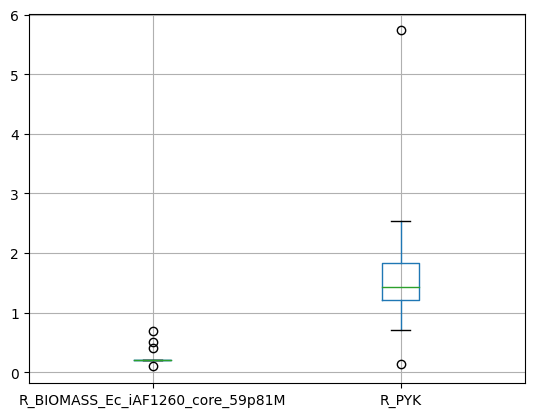

In [20]:
fluxes_boxplot[['R_BIOMASS_Ec_iAF1260_core_59p81M', 'R_PYK']].boxplot()

In [25]:
fluxes = pd.read_csv('data/ishii_data/fluxomics.csv', index_col='experiment')

In [28]:
for i in model.getReactionIds():
    if 'Ec' in i:
        print(i) 

R_BIOMASS_Ec_iAF1260_core_59p81M


In [35]:
from sklearn.base import TransformerMixin

class GramSchmidtScaler(TransformerMixin):
    def fit(self, X, y=None):
        # Ensure X is a numpy array
        self.X = np.array(X)
        return self
    
    def transform(self, X):
        # Ensure X is a numpy array
        X = np.array(X)
        
        # Normalize each vector
        normalized = X / np.linalg.norm(X, axis=0)
        
        # Perform Gram-Schmidt orthogonalization
        Q, _ = np.linalg.qr(normalized)
        
        return Q


# Original unscaled matrix
V = np.array([[1, 0, -1],
              [0, -2, 2],
              [-2, 1, 1]])  # Ensuring the third vector in V is orthogonal to S

# Vector for multiplication
S = np.array([1, 1, 1])

# Matrix-vector multiplication before normalization
SV_original = np.dot(V, S)
print("Matrix-vector multiplication before normalization:")
print(SV_original)

# Create an instance of the GramSchmidtScaler
gram_scaler = GramSchmidtScaler()

# Fit and transform the matrix V
V_transformed = gram_scaler.fit_transform(V)

# Matrix-vector multiplication after normalization
SV_transformed = np.dot(V_transformed, S)
print("\nMatrix-vector multiplication after normalization:")
print(SV_transformed)



Matrix-vector multiplication before normalization:
[0 0 0]

Matrix-vector multiplication after normalization:
[ 0.62083798 -0.75768218  1.42845298]


In [26]:
count=0
for i in fluxes.columns:
    if i in model.getReactionIds() or i+'_rev' in model.getReactionIds() or i+'_fwd' in model.getReactionIds():
        count+=1
    else:
        print(i)
print(count)

R_EX_glc_e_
R_EX_o2_e_
R_EX_co2_e_
R_EX_etoh_e_
R_EX_ac_e_
R_EX_lac_D_e_
R_EX_succ_e_
R_EX_pyr_e_
R_EX_for_e_
R_Ec_biomass_iAF1260_core_59p81M
37


In [18]:
print(len(model.getReactionIds()))
print(len(model.getSpeciesIds()))

543
1080


In [20]:
for i in model.getReactionIds():
    if 'EX' in i:
        print(i)

R_EX_co2_e_o
R_EX_h_e_o
R_EX_ac_e_o
R_EX_succ_e_o
R_EX_for_e_o
R_HEX7
R_EX_lac__D_e_o
R_HEX1
R_EX_hxa_e_o
R_EX_meoh_e_o
R_EX_ala__D_e_o
R_EX_nh4_e_o
R_EX_etoh_e_o
R_EX_pi_e_i
R_EX_co2_e_i
R_EX_fe3_e_i
R_EX_h_e_i
R_EX_pro__L_e_i
R_EX_glyc_e_i
R_EX_mn2_e_i
R_EX_ac_e_i
R_EX_ala__L_e_i
R_EX_pyr_e_i
R_EX_succ_e_i
R_EX_rib__D_e_i
R_EX_fe2_e_i
R_EX_fru_e_i
R_EX_gal_e_i
R_EX_gly_e_i
R_EX_melib_e_i
R_EX_tre_e_i
R_EX_zn2_e_i
R_EX_lac__D_e_i
R_EX_mg2_e_i
R_EX_ca2_e_i
R_EX_ni2_e_i
R_EX_cu2_e_i
R_EX_sel_e_i
R_EX_cobalt2_e_i
R_EX_h2o_e_i
R_EX_malt_e_i
R_EX_mobd_e_i
R_EX_so4_e_i
R_EX_thr__L_e_i
R_EX_nh4_e_i
R_EX_k_e_i
R_EX_na1_e_i
R_HEXt2rpp_o
R_EX_cl_e_i
R_EX_o2_e_i
R_EX_tungs_e_i
R_EX_slnt_e_i


In [5]:
fluxes = pd.read_csv('data/ishii_data/fluxomics.csv', index_col='experiment')
fluxes.columns

Index(['R_GLCptspp', 'R_PGI', 'R_PFK', 'R_FBA', 'R_TPI', 'R_PGK', 'R_GAPD',
       'R_ENO', 'R_PGM', 'R_PYK', 'R_PDH', 'R_G6PDH2r', 'R_PGL', 'R_GND',
       'R_RPE', 'R_RPI', 'R_TKT1', 'R_TALA', 'R_TKT2', 'R_CS', 'R_ACONTb',
       'R_ACONTa', 'R_ICDHyr', 'R_SUCOAS', 'R_AKGDH', 'R_SUCDi', 'R_FUM',
       'R_MDH', 'R_PPC', 'R_ME2', 'R_ICL', 'R_MALS', 'R_ACKr', 'R_PTAr',
       'R_LDH_D', 'R_ACALD', 'R_ALCD2x', 'R_EX_glc_e_', 'R_EX_o2_e_',
       'R_EX_co2_e_', 'R_EX_etoh_e_', 'R_EX_ac_e_', 'R_EX_lac_D_e_',
       'R_EX_succ_e_', 'R_EX_pyr_e_', 'R_EX_for_e_',
       'R_Ec_biomass_iAF1260_core_59p81M'],
      dtype='object')

In [6]:
from difflib import SequenceMatcher

# Two lists of flux names
flux_list1 = fluxes.columns  # Your first list
flux_list2 = ecoli_reactions  # Your second list

# Function to find similarity between two strings
def similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Find similar flux names
similar_fluxes = []

for flux1 in flux_list1:
    for flux2 in flux_list2:
        sim = similarity(flux1, flux2)
        if sim > 0.8:  # You can adjust the similarity threshold as needed
            similar_fluxes.append((flux1, flux2, sim))

# Print the similar flux names
for flux_pair in similar_fluxes:
    print(f"Similarity: {flux_pair[2]:.2f} - {flux_pair[0]} | {flux_pair[1]}")


Similarity: 1.00 - R_GLCptspp | R_GLCptspp
Similarity: 0.83 - R_PFK | R_PFK_3
Similarity: 0.83 - R_TPI | R_GTPCI
Similarity: 1.00 - R_PYK | R_PYK
Similarity: 0.91 - R_PYK | R_PYK4
Similarity: 0.91 - R_PYK | R_PYK2
Similarity: 0.91 - R_PYK | R_PYK3
Similarity: 0.91 - R_PYK | R_PYK6
Similarity: 0.83 - R_PDH | R_PPNDH
Similarity: 0.83 - R_PDH | R_IGPDH
Similarity: 1.00 - R_PDH | R_PDH
Similarity: 1.00 - R_CS | R_CS
Similarity: 1.00 - R_SUCDi | R_SUCDi
Similarity: 0.83 - R_PPC | R_PPCDC
Similarity: 1.00 - R_PPC | R_PPC
Similarity: 0.83 - R_MALS | R_ACLS
Similarity: 0.83 - R_ACKr | R_ACGK
Similarity: 0.82 - R_EX_glc_e_ | R_EX_ac_e_o
Similarity: 0.92 - R_EX_glc_e_ | R_EX_glyc_e_i
Similarity: 0.82 - R_EX_glc_e_ | R_EX_ac_e_i
Similarity: 0.87 - R_EX_glc_e_ | R_EX_gal_e_i
Similarity: 0.87 - R_EX_glc_e_ | R_EX_gly_e_i
Similarity: 0.82 - R_EX_glc_e_ | R_EX_cl_e_i
Similarity: 0.91 - R_EX_o2_e_ | R_EX_co2_e_o
Similarity: 0.82 - R_EX_o2_e_ | R_EX_for_e_o
Similarity: 0.91 - R_EX_o2_e_ | R_EX_co2_e_i


In [22]:
model = cbmpy.CBRead.loadModel('GEMs/e_coli_core.xml')
# splits reversible reations into reaction_fwd and reaction_rev
model = cbmpy.CBTools.splitReversibleReactions(model)
model.buildStoichMatrix()
ecoli_core_reactions = model.getReactionIds()

Attempting to load SBML file: GEMs/e_coli_core.xml
SBML Level 3 FBC version 2 model detected, loading with cbmpy.readSBML3FBC()
FBC version: 2
M.getNumReactions: 95
M.getNumSpecies: 72
FBC.getNumObjectives: 1
FBC.getNumParameters: 5
FBC.getNumGeneProducts: 137
Zero dimension compartment detected: e
Zero dimension compartment detected: c
FluxBounds process1: 0.003
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.002

User defined contraint FBC version 2
SBML3 load time: 0.213

getState1
Model clone time: 0.35610342025756836
Reversible reaction splitter is processing: R_PGI
Deleting reaction R_PGI and 2 associated bounds
Reversible reaction splitter is processing: R_PGK
Deleting reaction R_PGK and 2 associated bounds
Reversible reaction splitter is processing: R_ACALD
Deleting reaction R_ACALD and 2 associated bounds
Reversible reaction splitter is processing: R_AKGt2r
Deleting reaction R_AKGt2r and 2 associated bounds
Reversible reaction splitter is processing: R

In [23]:
print(len(model.getReactionIds()))
print(len(model.getSpeciesIds()))

142
72


In [24]:
fluxes = pd.read_csv('data/ishii_data/fluxomics.csv', index_col='experiment')
fluxes.columns

Index(['R_GLCptspp', 'R_PGI', 'R_PFK', 'R_FBA', 'R_TPI', 'R_PGK', 'R_GAPD',
       'R_ENO', 'R_PGM', 'R_PYK', 'R_PDH', 'R_G6PDH2r', 'R_PGL', 'R_GND',
       'R_RPE', 'R_RPI', 'R_TKT1', 'R_TALA', 'R_TKT2', 'R_CS', 'R_ACONTb',
       'R_ACONTa', 'R_ICDHyr', 'R_SUCOAS', 'R_AKGDH', 'R_SUCDi', 'R_FUM',
       'R_MDH', 'R_PPC', 'R_ME2', 'R_ICL', 'R_MALS', 'R_ACKr', 'R_PTAr',
       'R_LDH_D', 'R_ACALD', 'R_ALCD2x', 'R_EX_glc_e_', 'R_EX_o2_e_',
       'R_EX_co2_e_', 'R_EX_etoh_e_', 'R_EX_ac_e_', 'R_EX_lac_D_e_',
       'R_EX_succ_e_', 'R_EX_pyr_e_', 'R_EX_for_e_',
       'R_Ec_biomass_iAF1260_core_59p81M'],
      dtype='object')

In [4]:
from difflib import SequenceMatcher

# Two lists of flux names
flux_list1 = ['R_GLCptspp', 'R_PGI', ...]  # Your first list
flux_list2 = ['R_SHK3Dr_for', 'R_OMPDC', ...]  # Your second list

# Function to find similarity between two strings
def similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Find similar flux names
similar_fluxes = []

for flux1 in flux_list1:
    for flux2 in flux_list2:
        sim = similarity(flux1, flux2)
        if sim > 0.8:  # You can adjust the similarity threshold as needed
            similar_fluxes.append((flux1, flux2, sim))

# Print the similar flux names
for flux_pair in similar_fluxes:
    print(f"Similarity: {flux_pair[2]:.2f} - {flux_pair[0]} | {flux_pair[1]}")


['R_SHK3Dr_for',
 'R_OMPDC',
 'R_CS',
 'R_ICDHyr_for',
 'R_ACALD_for',
 'R_PPA',
 'R_APRAUR',
 'R_DB4PS',
 'R_ALAR_for',
 'R_RBFK',
 'R_ALATA_L_for',
 'R_RBK',
 'R_GLYK',
 'R_RBFSb',
 'R_PYK',
 'R_SHCHD2',
 'R_EX_co2_e_o',
 'R_A5PISO_for',
 'R_PMDPHT',
 'R_CPPPGO',
 'R_RBFSa',
 'R_ACHBS',
 'R_PFK_3',
 'R_DHAD2',
 'R_ACLS',
 'R_PSCVT_for',
 'R_PFL',
 'R_ANS',
 'R_FRD2',
 'R_FRD3',
 'R_ANPRT',
 'R_CHORM',
 'R_PTAr_for',
 'R_CHORS',
 'R_IGPS',
 'R_ACKr_for',
 'R_LEUTAi',
 'R_EX_h_e_o',
 'R_DMATT',
 'R_GRTT',
 'R_UPP3S',
 'R_UPPDC1',
 'R_EX_ac_e_o',
 'R_EX_succ_e_o',
 'R_MOAT',
 'R_UDCPDPS',
 'R_ECOAH6_for',
 'R_USHD',
 'R_ENO_for',
 'R_HCO3E_for',
 'R_IMPD',
 'R_ECOAH4_for',
 'R_LPADSS',
 'R_GLUTRS',
 'R_TDSK',
 'R_PGI_for',
 'R_TMPPP',
 'R_RPE_for',
 'R_DHQTi',
 'R_IPMD',
 'R_TALA_for',
 'R_ADSL2r_for',
 'R_TKT1_for',
 'R_TMDS',
 'R_PPCDC',
 'R_DHAD1',
 'R_MDH_for',
 'R_FUM_for',
 'R_FMNAT',
 'R_SERD_L',
 'R_THRD',
 'R_KARA2_for',
 'R_EX_for_e_o',
 'R_ACCOAC',
 'R_NADK',
 'R_GLUTRR',
 'R

In [25]:
fluxes = pd.read_csv('data/ishii_data/fluxomics.csv', index_col='experiment')
fluxes= fluxes.rename(columns={'R_GLCptspp': 'R_GLCpts',
                            'R_Ec_biomass_iAF1260_core_59p81M': 'R_BIOMASS_Ecoli_core_w_GAM',
                            'R_EX_glc_e_':'R_EX_glc__D_e',
                            'R_EX_etoh_e_':'R_EX_etoh_e',
                            'R_EX_ac_e_': 'R_EX_ac_e_',
                            'R_EX_lac_D_e_': 'R_EX_lac__D_e',
                            'R_EX_succ_e_': 'R_EX_succ_e',  
                            'R_EX_pyr_e_': 'R_EX_pyr_e',
                            'R_EX_for_e_': 'R_EX_for_e',
                            'R_EX_o2_e_': 'R_EX_o2_e',
                            'R_EX_co2_e_': 'R_EX_co2_e',
                            'R_EX_ac_e_': 'R_EX_ac_e'})

In [15]:
fluxes.columns

Index(['R_GLCpts', 'R_PGI', 'R_PFK', 'R_FBA', 'R_TPI', 'R_PGK', 'R_GAPD',
       'R_ENO', 'R_PGM', 'R_PYK', 'R_PDH', 'R_G6PDH2r', 'R_PGL', 'R_GND',
       'R_RPE', 'R_RPI', 'R_TKT1', 'R_TALA', 'R_TKT2', 'R_CS', 'R_ACONTb',
       'R_ACONTa', 'R_ICDHyr', 'R_SUCOAS', 'R_AKGDH', 'R_SUCDi', 'R_FUM',
       'R_MDH', 'R_PPC', 'R_ME2', 'R_ICL', 'R_MALS', 'R_ACKr', 'R_PTAr',
       'R_LDH_D', 'R_ACALD', 'R_ALCD2x', 'R_EX_glc__D_e', 'R_EX_o2_e',
       'R_EX_co2_e', 'R_EX_etoh_e', 'R_EX_ac_e', 'R_EX_lac__D_e',
       'R_EX_succ_e', 'R_EX_pyr_e', 'R_EX_for_e',
       'R_BIOMASS_Ecoli_core_w_GAM'],
      dtype='object')

In [29]:
non_split = cbmpy.CBRead.loadModel('GEMs/e_coli_core.xml')

Attempting to load SBML file: GEMs/e_coli_core.xml
SBML Level 3 FBC version 2 model detected, loading with cbmpy.readSBML3FBC()
FBC version: 2
M.getNumReactions: 95
M.getNumSpecies: 72
FBC.getNumObjectives: 1
FBC.getNumParameters: 5
FBC.getNumGeneProducts: 137
Zero dimension compartment detected: e
Zero dimension compartment detected: c
FluxBounds process1: 0.003
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.002

User defined contraint FBC version 2
SBML3 load time: 0.213



In [ ]:
df

In [30]:
non_split.getReaction('R_GLCpts').getStoichiometry()

[(-1.0, 'M_glc__D_e'), (-1.0, 'M_pep_c'), (1.0, 'M_g6p_c'), (1.0, 'M_pyr_c')]

In [28]:
model.getReaction('R_GLCpts').getStoichiometry()

[(-1.0, 'M_glc__D_e'), (-1.0, 'M_pep_c'), (1.0, 'M_g6p_c'), (1.0, 'M_pyr_c')]

In [ ]:
math.copysign(1,  value) == -1

In [26]:
fluxes_to_discard = []

for flux in fluxes.columns:
    if flux in ecoli_core_reactions:
        fluxes[flux] = fluxes[flux].abs()
    elif math.copysign(1, fluxes[flux][0]) == -1 and flux+'_rev' in ecoli_core_reactions:
        fluxes=fluxes.rename(columns={flux:flux+'_rev'})
        fluxes[flux+'_rev'] = fluxes[flux+'_rev'].abs()
        fluxes_to_discard.append(flux+'_fwd') 
    # fluxes that are positive in the reference must be fwd
    elif math.copysign(1, fluxes[flux][0]) == 1 and flux+'_fwd' in ecoli_core_reactions:
        fluxes=fluxes.rename(columns={flux:flux+'_fwd'})
        fluxes_to_discard.append(flux+'_rev')


R_GLCpts
R_PFK
R_PYK
R_PDH
R_PGL
R_GND
R_CS
R_AKGDH
R_SUCDi
R_PPC
R_ME2
R_ICL
R_MALS
R_EX_etoh_e
R_EX_ac_e
R_EX_lac__D_e
R_EX_succ_e
R_EX_pyr_e
R_EX_for_e
R_BIOMASS_Ecoli_core_w_GAM


In [31]:
pd.read_csv('data/ishii_data/fluxomics_ecore_correct.csv', index_col='experiment')

,R_GLCpts,R_PGI_fwd,R_PFK,R_FBA_fwd,R_TPI_fwd,R_PGK_rev,R_GAPD_fwd,R_ENO_fwd,R_PGM_rev,R_PYK,...,R_EX_glc__D_e_rev,R_EX_o2_e_rev,R_EX_co2_e_fwd,R_EX_etoh_e,R_EX_ac_e,R_EX_lac__D_e,R_EX_succ_e,R_EX_pyr_e,R_EX_for_e,R_BIOMASS_Ecoli_core_w_GAM
experiment,,,,,,,,,,,,,,,,,,,,,
REF,2.93,2.2854,2.49929,2.49929,2.49929,5.0396,5.0396,4.73781,4.73781,1.38589,...,2.93,5.79,4.11,0.00,0.00,0.0,0.00,0.00,0.00,0.2
WT_0.1h-1,1.34,0.8308,1.07200,1.07200,1.07200,2.2378,2.2378,2.10380,2.10380,0.71020,...,1.34,2.20,0.31,0.00,0.00,0.0,0.00,0.00,0.00,0.1
WT_0.4h-1,5.05,3.1815,3.98950,3.98950,3.98950,8.3325,8.3325,7.72650,7.72650,1.26250,...,5.05,9.57,7.88,0.00,0.01,0.0,0.00,0.00,0.00,0.4
WT_0.5h-1,6.63,5.5029,5.76810,5.76810,5.76810,11.4699,11.4699,10.74060,10.74060,2.25420,...,6.63,13.05,8.95,0.15,0.49,0.0,0.00,0.00,0.13,0.5
WT_0.7h-1,13.34,7.4704,10.67200,10.67200,10.67200,22.6780,22.6780,21.61080,21.61080,5.73620,...,13.34,14.87,10.83,0.15,1.93,0.0,0.00,0.01,0.08,0.7
galM,3.04,1.9456,2.46240,2.46240,2.46240,5.1072,5.1072,4.83360,4.83360,1.67200,...,3.04,15.53,5.76,0.00,0.00,0.0,0.00,0.00,0.00,0.2
glk,3.14,2.7318,2.79460,2.79460,2.79460,5.5578,5.5578,5.24380,5.24380,1.60140,...,3.14,5.44,6.46,0.00,0.00,0.0,0.00,0.00,0.00,0.2
pgm,3.06,2.3868,2.63160,2.63160,2.63160,5.2938,5.2938,5.01840,5.01840,1.53000,...,3.06,5.79,6.12,0.00,0.00,0.0,0.00,0.00,0.00,0.2
pgi,2.73,0.0000,0.92820,0.92820,0.92820,3.2760,3.2760,2.97570,2.97570,0.13650,...,2.73,4.45,5.04,0.00,0.00,0.0,0.00,0.00,0.00,0.2


In [16]:
# delete reactions for each id present in the list reaction2delete
for i in list(fluxes_to_discard):
    model.deleteReactionAndBounds(i)

#delete non reacting metabolites
model.deleteNonReactingSpecies(simulate=False)

Deleting reaction R_GLUt2r_rev and 2 associated bounds
Deleting reaction R_PGI_rev and 2 associated bounds
Deleting reaction R_FBA_rev and 2 associated bounds
Deleting reaction R_TPI_rev and 2 associated bounds
Deleting reaction R_PGK_fwd and 2 associated bounds
Deleting reaction R_GAPD_rev and 2 associated bounds
Deleting reaction R_ENO_rev and 2 associated bounds
Deleting reaction R_PGM_fwd and 2 associated bounds
Deleting reaction R_G6PDH2r_rev and 2 associated bounds
Deleting reaction R_RPE_rev and 2 associated bounds
Deleting reaction R_RPI_fwd and 2 associated bounds
Deleting reaction R_TKT1_rev and 2 associated bounds
Deleting reaction R_TALA_rev and 2 associated bounds
Deleting reaction R_TKT2_rev and 2 associated bounds
Deleting reaction R_ACONTb_rev and 2 associated bounds
Deleting reaction R_ACONTa_rev and 2 associated bounds
Deleting reaction R_ICDHyr_rev and 2 associated bounds
Deleting reaction R_SUCOAS_fwd and 2 associated bounds
Deleting reaction R_FUM_rev and 2 associa

[]

In [17]:
print(len(model.getReactionIds()))
print(len(model.getSpeciesIds()))

115
72


In [20]:
# save reduced model in a xml file
cbmpy.CBWrite.saveModel(model, filename='GEMs/e_coli_core_ishii.xml')


INFO: using FBC version: 2
INFO: V2 bounds compression enabled
[]
{'quadratic_objective': ''}
INFO: added 0 non fluxbound parameters to model
Model exported as: GEMs/e_coli_core_ishii.xml


In [ ]:
import numpy as np


# Define the matrix S and vector V
S = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
V = np.array([1, -2, 1])

# Check SV = 0
result = np.dot(S, V)

print("Result of SV without scaling:")
print(result)

# Check if SV is approximately zero
is_zero = np.allclose(result, 0)
print("Is SV approximately zero?", is_zero)

# Min-max scale vector V
V_scaled = (V - np.min(V)) / (np.max(V) - np.min(V))

# Check S(V_scaled) = 0
result_scaled = np.dot(S, V_scaled)

print("\nResult of S(V_scaled) with min-max scaling:")
print(result_scaled)

# Check if S(V_scaled) is approximately zero
is_zero_scaled = np.allclose(result_scaled, 0)
print("Is S(V_scaled) approximately zero?", is_zero_scaled)